<a href="https://colab.research.google.com/github/friskyspock/cat-vs-dog-image-classification/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dir = '/content/drive/MyDrive/colab/cats-vs-dogs/train/'
img_height = 128
img_width = 128
batch_size = 200

In [4]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 24958 files belonging to 2 classes.
Using 19967 files for training.


In [5]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 24958 files belonging to 2 classes.
Using 4991 files for validation.


In [6]:
class_names = train_dataset.class_names
class_names

['Cats', 'Dogs']

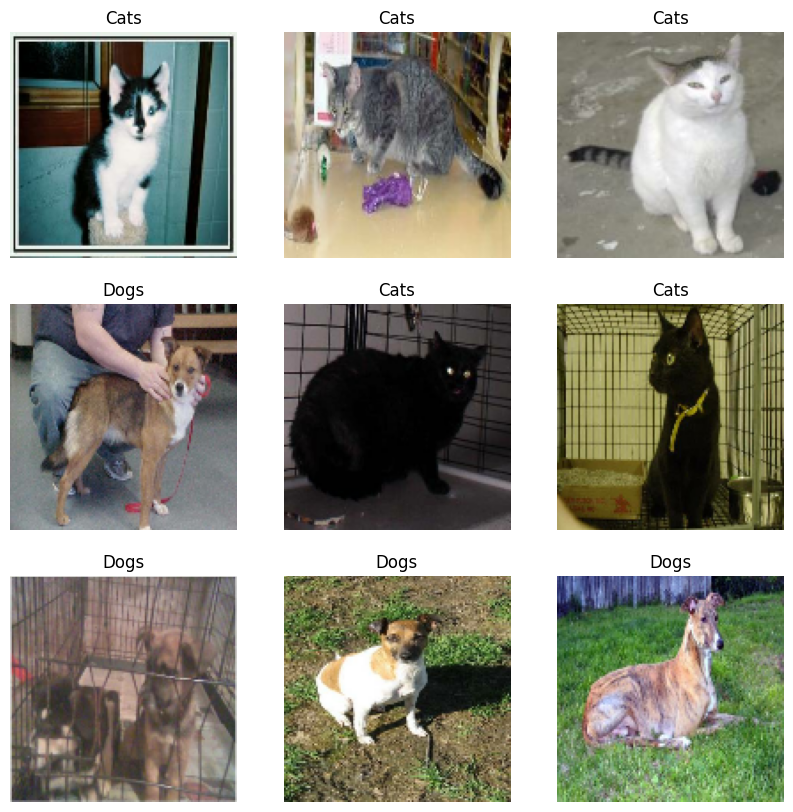

In [8]:
plt.figure(figsize=(10,10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(200, 128, 128, 3)
(200,)


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.RandomRotation(.25),
  tf.keras.layers.RandomZoom(.5,.2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 128, 128, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [11]:
history = model.fit(train_dataset,validation_data=val_dataset,epochs=60)

Epoch 1/60
100/100 [==============================] - 4840s 49s/step - loss: 0.6788 - accuracy: 0.5618 - val_loss: 0.6869 - val_accuracy: 0.5760
Epoch 2/60
100/100 [==============================] - 7s 72ms/step - loss: 0.6177 - accuracy: 0.6558 - val_loss: 0.5942 - val_accuracy: 0.6666
Epoch 3/60
100/100 [==============================] - 7s 72ms/step - loss: 0.5778 - accuracy: 0.6965 - val_loss: 0.5663 - val_accuracy: 0.7059
Epoch 4/60
100/100 [==============================] - 7s 70ms/step - loss: 0.5532 - accuracy: 0.7136 - val_loss: 0.5622 - val_accuracy: 0.7049
Epoch 5/60
100/100 [==============================] - 7s 71ms/step - loss: 0.5400 - accuracy: 0.7274 - val_loss: 0.5494 - val_accuracy: 0.7149
Epoch 6/60
100/100 [==============================] - 7s 71ms/step - loss: 0.5267 - accuracy: 0.7374 - val_loss: 0.5126 - val_accuracy: 0.7395
Epoch 7/60
100/100 [==============================] - 7s 70ms/step - loss: 0.5146 - accuracy: 0.7433 - val_loss: 0.4907 - val_accuracy: 0.76

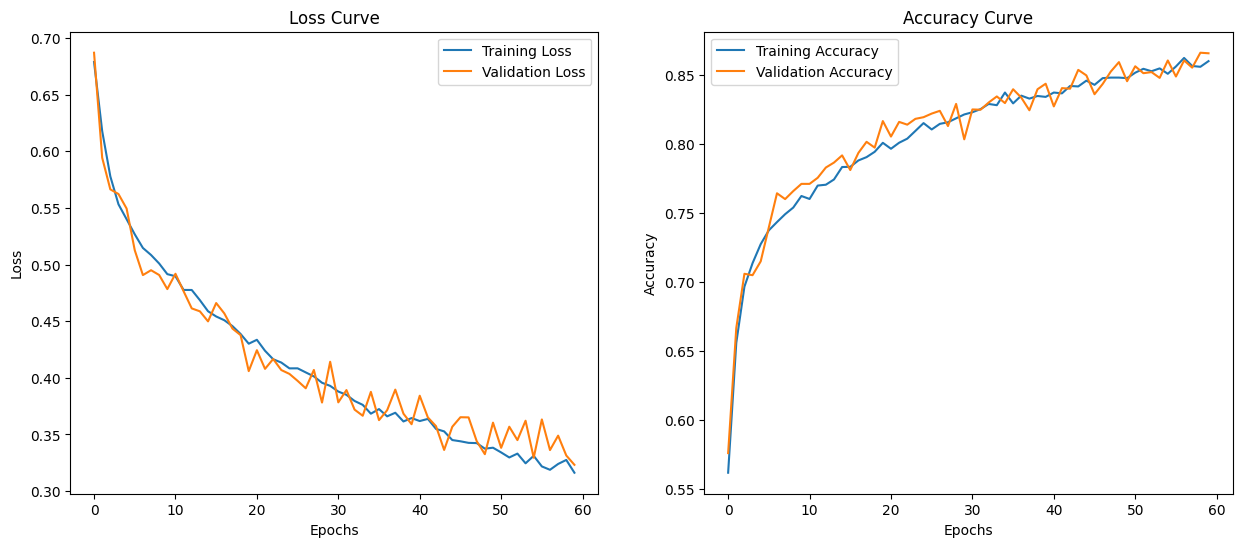

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()